## Import Libraries

In [2]:
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.signal import convolve2d
from skimage.io import imread, imsave
import matplotlib.pyplot as plt

conv2 = lambda x,k: convolve2d(x, k, mode='same', boundary='wrap')

## Basic Conjugate Gradient Algorithm

We are trying to solve the system of linear equations $Q x + b = 0$

$\bullet$ Begin with some guess $x_{0}$ for $x$ (say all zeros)

$\bullet$  $k=0, r_{0} \leftarrow b-Q x_{0}, \quad p_{0} \leftarrow r_{0}$

$\bullet$ Repeat

$\quad \alpha_{k} \leftarrow \frac{r_{k}^{T} r_{k}}{p_{k}^{T} Q p_{k}}$ 

$\quad x_{k+1}=x_{k}+\alpha_{k} p_{k}$ 

$\quad r_{k+1}=r_{k}-\alpha_{k} Q p_{k}$

$\quad \beta_{k}=\frac{r_{k+1}^{T} r_{k+1}}{r_{k}^{T} r_{k}}$

$\quad p_{k+1}=r_{k+1}+\beta_{k} p_{k}$

$\quad k=k+1$

## Load Image

img shape: (600, 540)


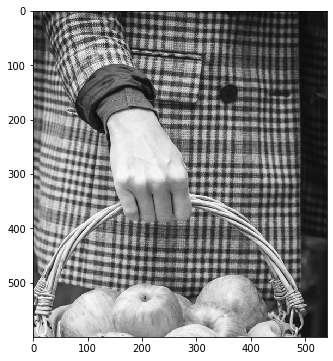

In [5]:
img_raw = np.array(imread('apples.jpg')).astype(np.float64) / 255.
img = np.mean(img_raw, axis=2)
img = img[0:600, 100:900]
print("img shape:", img.shape)
plt.figure(figsize=(12, 6))
plt.imshow(img, cmap='gray')
plt.show()

## Define a blur kernel

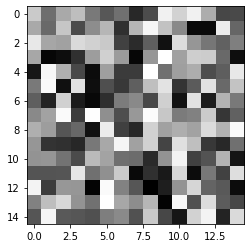

In [33]:
# Define a blur kernel
# k = np.float32(imread('blur_kernel.png', as_gray=True))
k = np.random.random([15,15])
k = k / np.sum(k)
plt.imshow(k, cmap='gray')

## Apply blur kernel

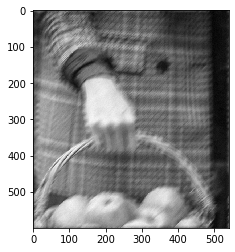

In [34]:
# Blur the image and add noise
img_blur = conv2(img, k) + np.random.normal(scale=0.01, size=img.shape)
plt.imshow(blur, cmap='gray')

In [35]:
# Derivative kernel
kx = np.array([[1.,0,-1.],
               [2.,0,-2.],
               [1.,0,-1.]])
ky = np.array([[1.,2.,1.],
               [0,0,0],
               [-1.,-2.,-1.]])

# Gaussian derivative
gx = gaussian_filter(kx, sigma=1, mode='wrap')
gy = gaussian_filter(ky, sigma=1, mode='wrap')

# Flipped kernels
k_f = k[::-1,::-1].copy() # or np.flip()
gx_f = gx[::-1,::-1].copy()
gy_f = gy[::-1,::-1].copy()

In [36]:
# Deblur with conjugate gradient method

# Params
niter = 100
lmd = 0.1

# k = 0
X = np.zeros(img.shape)
QX = conv2(conv2(X,k), k_f) + \
    lmd * conv2(conv2(X,gx), gx_f) + \
    lmd * conv2(conv2(X,gy), gy_f)
b = conv2(img_blur, k_f)
r = b - QX
p = r.copy()

# Iteratively
for i in range(niter):
    print('.', end='')
    Qp = conv2(conv2(p,k), k_f) + \
        lmd * conv2(conv2(p,gx), gx_f) + \
        lmd * conv2(conv2(p,gy), gy_f)
    alpha = np.sum(r**2) / np.sum(p*Qp)
    X = X + alpha*p
    r_next = r - alpha*Qp
    beta = np.sum(r_next**2) / np.sum(r**2)
    p = r_next + beta*p
    r = r_next

....................................................................................................

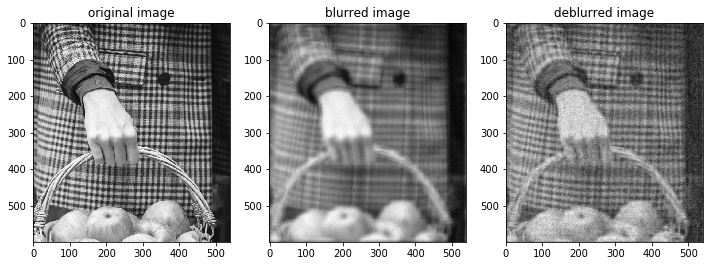

In [37]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('original image')
plt.subplot(1, 3, 2)
plt.imshow(img_blur, cmap='gray')
plt.title('blurred image')
plt.subplot(1, 3, 3)
plt.imshow(X, cmap='gray')
plt.title('deblurred image')
plt.show()